In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from zoneinfo import ZoneInfo

In [31]:
no2_patrick=pd.read_csv('../mydata/datasets_for_model/cleaned/SPS_cleaned.csv')
no2_patrick.head()

,Unnamed: 0,X.1,X,Timestamp,counter.1,counter.2,rain,temp,wetb,dewpt,...,w,sun,vis,clht,clamt,NO2,date,hour,school_term,weekday_iso
0,1,1,1,06-08-2023 18:00,646,1469,0.0,17.7,13.0,8.6,...,11,0.9,40000,999,3,4.546333,2023-08-06,18,0,7
1,2,2,2,06-08-2023 19:00,561,1342,0.0,17.4,12.5,7.7,...,81,0.5,40000,999,3,7.494000,2023-08-06,19,0,7
2,3,3,3,06-08-2023 20:00,456,1026,0.0,15.8,12.1,8.6,...,11,0.1,40000,40,6,15.218667,2023-08-06,20,0,7
3,4,4,4,06-08-2023 21:00,342,778,0.0,14.8,11.2,7.5,...,11,0.0,40000,999,3,16.156333,2023-08-06,21,0,7
4,5,5,5,06-08-2023 22:00,241,673,0.0,13.5,10.9,8.4,...,11,0.0,40000,999,1,15.990667,2023-08-06,22,0,7


In [32]:
no2_patrick['Timestamp'] = pd.to_datetime(no2_patrick['Timestamp'], format='%d-%m-%Y %H:%M', errors='coerce')

# Drop rows with invalid timestamps or missing NO2 values
no2_patrick = no2_patrick.dropna(subset=['Timestamp', 'NO2'])

In [34]:
no2_patrick.head(7)

,Unnamed: 0,X.1,X,Timestamp,counter.1,counter.2,rain,temp,wetb,dewpt,...,w,sun,vis,clht,clamt,NO2,date,hour,school_term,weekday_iso
0,1,1,1,2023-08-06 18:00:00,646,1469,0.0,17.7,13.0,8.6,...,11,0.9,40000,999,3,4.546333,2023-08-06,18,0,7
1,2,2,2,2023-08-06 19:00:00,561,1342,0.0,17.4,12.5,7.7,...,81,0.5,40000,999,3,7.494000,2023-08-06,19,0,7
2,3,3,3,2023-08-06 20:00:00,456,1026,0.0,15.8,12.1,8.6,...,11,0.1,40000,40,6,15.218667,2023-08-06,20,0,7
3,4,4,4,2023-08-06 21:00:00,342,778,0.0,14.8,11.2,7.5,...,11,0.0,40000,999,3,16.156333,2023-08-06,21,0,7
4,5,5,5,2023-08-06 22:00:00,241,673,0.0,13.5,10.9,8.4,...,11,0.0,40000,999,1,15.990667,2023-08-06,22,0,7
5,6,6,6,2023-08-06 23:00:00,162,544,0.0,12.6,10.6,8.6,...,11,0.0,40000,999,1,19.019333,2023-08-06,23,0,7
6,7,7,7,2023-08-07 00:00:00,127,462,0.0,12.0,10.4,8.9,...,11,0.0,40000,999,1,18.230667,2023-08-07,0,0,1


In [33]:
no2_patrick['date']=pd.to_datetime(no2_patrick['Timestamp']).dt.date


In [47]:
no2_patrick['period']=''

In [54]:
no2_patrick[(no2_patrick['date']>=pd.to_datetime('2023-12-01 00:00:00').date() )&( no2_patrick['date']<=pd.to_datetime('2024-03-31 23:00:00').date())]['period']='2'

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1331948\134502446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no2_patrick[(no2_patrick['date']>=pd.to_datetime('2023-12-01 00:00:00').date() )&( no2_patrick['date']<=pd.to_datetime('2024-03-31 23:00:00').date())]['period']='2'


In [59]:
# August to November
no2_patrick.loc[
    (no2_patrick['date'] >= pd.to_datetime('2023-08-06 18:00:00').date()) &
    (no2_patrick['date'] <= pd.to_datetime('2023-11-01 23:00:00').date()),
    'period'
] = 'August to October'

# December to March
no2_patrick.loc[
    (no2_patrick['date'] >= pd.to_datetime('2023-11-02 00:00:00').date()) &
    (no2_patrick['date'] <= pd.to_datetime('2024-04-30 23:00:00').date()),
    'period'
] = 'November to April'

# April to June
no2_patrick.loc[
    (no2_patrick['date'] >= pd.to_datetime('2024-05-01 00:00:00').date()) &
    (no2_patrick['date'] <= pd.to_datetime('2024-06-30 23:00:00').date()),
    'period'
] = 'May to June'



In [60]:
no2_patrick['period']

0       August to October
1       August to October
2       August to October
3       August to October
4       August to October
              ...        
7079          May to June
7080          May to June
7081          May to June
7082          May to June
7083          May to June
Name: period, Length: 7084, dtype: object

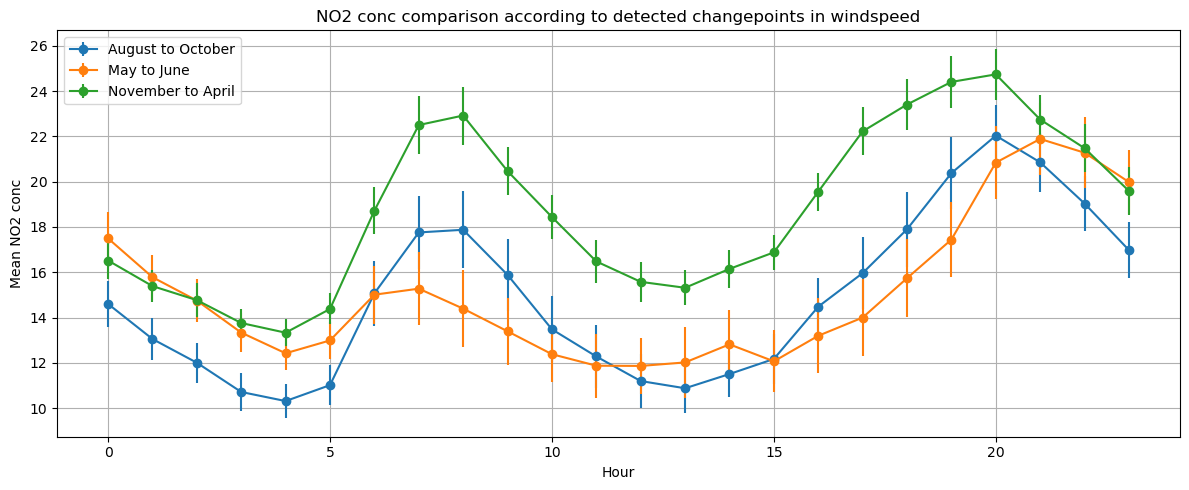

In [62]:
import scipy.stats as stats

agg_df_c1 = no2_patrick.groupby(["period", "hour"])["NO2"].agg(['mean', 'std', 'count']).reset_index()

agg_df_c1['sem'] = agg_df_c1['std'] / agg_df_c1['count']**0.5  # Standard error
agg_df_c1['ci95'] = agg_df_c1['sem'] * stats.t.ppf(0.975, df=agg_df_c1['count'] - 1)

pivot_mean = agg_df_c1.pivot(index='hour', columns='period', values='mean')
pivot_ci = agg_df_c1.pivot(index='hour', columns='period', values='ci95')


plt.figure(figsize=(12,5))
for week in pivot_mean.columns:
    plt.errorbar(pivot_mean.index,
                 pivot_mean[week],
                 yerr=pivot_ci[week],
                 fmt='-o',
                 label=week)
    
plt.title("NO2 conc comparison according to detected changepoints in windspeed")
plt.xlabel("Hour")
plt.ylabel("Mean NO2 conc")
plt.legend()
plt.grid(True)
plt.tight_layout()


In [ ]:
no2_patrick[(no2_patrick['date']>=pd.to_datetime('2023-08-06 18:00:00').date() )&( no2_patrick['date']<=pd.to_datetime('2023-11-17 23:00:00').date())]
no2_patrick[(no2_patrick['date']>=pd.to_datetime('2023-11-18 00:00:00').date() )&( no2_patrick['date']<=pd.to_datetime('2024-03-20 23:00:00').date())]
no2_patrick[(no2_patrick['date']>=pd.to_datetime('2024-03-21 00:00:00').date() )&( no2_patrick['date']<=pd.to_datetime('2024-06-30 23:00:00').date())]



In [40]:
time1['hour']

0       18
1       19
2       20
3       21
4       22
        ..
2424    19
2425    20
2426    21
2427    22
2428    23
Name: hour, Length: 2429, dtype: int64

In [41]:
time1.groupby('hour')['NO2'].mean()

hour
0     14.452863
1     13.122638
2     12.147840
3     10.871112
4     10.367208
5     11.212080
6     15.718023
7     19.066964
8     19.527562
9     16.939477
10    14.365197
11    12.750886
12    11.692742
13    11.398197
14    12.064221
15    12.830821
16    15.653123
17    17.276350
18    18.943966
19    21.135862
20    22.363145
21    21.187054
22    19.487271
23    17.030306
Name: NO2, dtype: float64

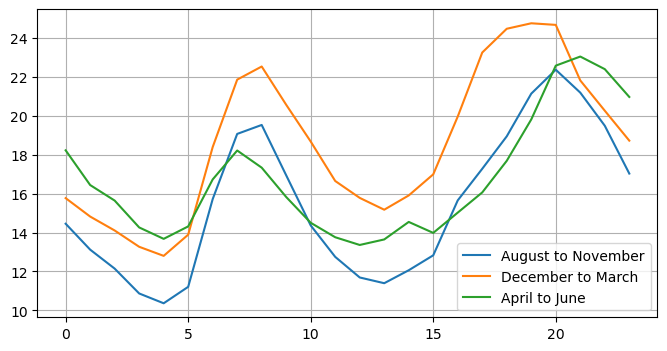

In [46]:
t1_no2_vals=time1.groupby('hour')['NO2'].mean()
t2_no2_vals=time2.groupby('hour')['NO2'].mean()
t3_no2_vals=time3.groupby('hour')['NO2'].mean()
plt.figure(figsize=(8,4))
plt.plot(t1_no2_vals, label='August to November')
plt.plot(t2_no2_vals, label='December to March')
plt.plot(t3_no2_vals, label='April to June')

plt.legend()
plt.grid(True)

In [ ]:
# Convert 'Timestamp' to datetime in UTC
no2_patrick['Timestamp'] = pd.to_datetime(no2_patrick['Timestamp'], format='%d-%m-%Y %H:%M', errors='coerce', utc=True)

# Drop rows with invalid timestamps or missing NO2 values
no2_patrick = no2_patrick.dropna(subset=['Timestamp', 'NO2'])

# Convert to Irish local time (handles DST automatically)
# no2_patrick['Timestamp'] = no2_patrick['Timestamp'].dt.tz_convert(ZoneInfo("Europe/Dublin"))

In [12]:
no2_patrick.reset_index(inplace=True)

In [9]:

no2_patrick['hour']=pd.to_datetime(no2_patrick['Timestamp']).dt.hour
no2_patrick['date']=pd.to_datetime(no2_patrick['Timestamp']).dt.date

#how to specify the format in pd.datetime() to convert in into date object?

In [10]:

no2_patrick


,Timestamp,NO2,hour,date
0,2020-01-07 00:00:00+00:00,1.89,0,2020-01-07
1,2020-01-07 01:00:00+00:00,1.79,1,2020-01-07
2,2020-01-07 02:00:00+00:00,1.64,2,2020-01-07
3,2020-01-07 03:00:00+00:00,1.78,3,2020-01-07
4,2020-01-07 04:00:00+00:00,2.06,4,2020-01-07
...,...,...,...,...
34541,2024-12-07 19:00:00+00:00,6.95,19,2024-12-07
34542,2024-12-07 20:00:00+00:00,7.00,20,2024-12-07
34543,2024-12-07 21:00:00+00:00,6.89,21,2024-12-07
34544,2024-12-07 22:00:00+00:00,6.59,22,2024-12-07


In [11]:
fw =no2_patrick[((no2_patrick['date']>=pd.to_datetime('2023-05-15').date()) & (no2_patrick['date']<=pd.to_datetime('2023-05-19').date()))]
sw=no2_patrick[((no2_patrick['date']>=pd.to_datetime('2023-05-22').date()) & (no2_patrick['date']<=pd.to_datetime('2023-05-26').date()))]

In [12]:
lst=[]
for i in range(0,len(fw)):
    lst.append(i)

Text(0, 0.5, 'NO2')

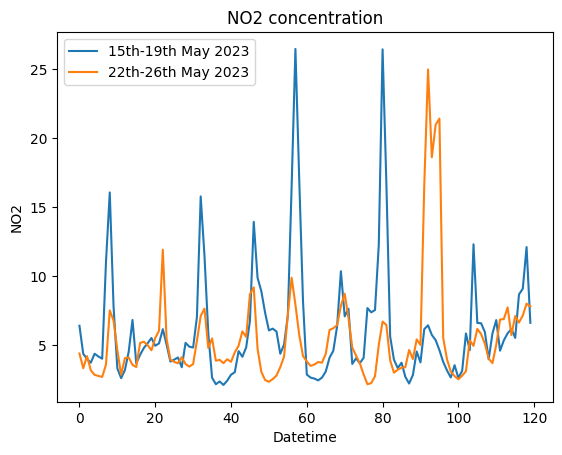

In [13]:
plt.plot(lst,fw['NO2'], label='15th-19th May 2023')
plt.plot(lst,sw['NO2'], label='22th-26th May 2023')

# plt.grid(True )
plt.legend()
plt.title('NO2 concentration')
plt.xlabel('Datetime')
plt.ylabel('NO2')

In [14]:
no2_patrick=no2_patrick[(no2_patrick['date']>=pd.to_datetime('2022-01-01').date()) & (no2_patrick['date']<=pd.to_datetime('2024-12-31').date())]

In [15]:
#how to drop rows in a dataframe whose one column has na rows?
no2_patrick.dropna(subset=['NO2'],inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_474376\2607155746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no2_patrick.dropna(subset=['NO2'],inplace=True)


In [16]:
no2_patrick

,Timestamp,NO2,hour,date
12141,2022-01-01 00:00:00+00:00,2.80,0,2022-01-01
12142,2022-01-01 01:00:00+00:00,2.43,1,2022-01-01
12143,2022-01-01 02:00:00+00:00,2.26,2,2022-01-01
12144,2022-01-01 03:00:00+00:00,2.33,3,2022-01-01
12145,2022-01-01 04:00:00+00:00,1.84,4,2022-01-01
...,...,...,...,...
34541,2024-12-07 19:00:00+00:00,6.95,19,2024-12-07
34542,2024-12-07 20:00:00+00:00,7.00,20,2024-12-07
34543,2024-12-07 21:00:00+00:00,6.89,21,2024-12-07
34544,2024-12-07 22:00:00+00:00,6.59,22,2024-12-07


In [17]:
no2_patrick.reset_index(inplace=True)
no2_patrick

,index,Timestamp,NO2,hour,date
0,12141,2022-01-01 00:00:00+00:00,2.80,0,2022-01-01
1,12142,2022-01-01 01:00:00+00:00,2.43,1,2022-01-01
2,12143,2022-01-01 02:00:00+00:00,2.26,2,2022-01-01
3,12144,2022-01-01 03:00:00+00:00,2.33,3,2022-01-01
4,12145,2022-01-01 04:00:00+00:00,1.84,4,2022-01-01
...,...,...,...,...,...
22400,34541,2024-12-07 19:00:00+00:00,6.95,19,2024-12-07
22401,34542,2024-12-07 20:00:00+00:00,7.00,20,2024-12-07
22402,34543,2024-12-07 21:00:00+00:00,6.89,21,2024-12-07
22403,34544,2024-12-07 22:00:00+00:00,6.59,22,2024-12-07


In [18]:
no2_patrick.drop(columns=['index'], axis=1, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_474376\2860247154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no2_patrick.drop(columns=['index'], axis=1, inplace=True)


In [19]:
from datetime import datetime
start_time= datetime.strptime("2023-10-23", "%Y-%m-%d").date()
end_time = datetime.strptime("2023-10-27", "%Y-%m-%d").date()

no2_patrick_bef_MT=no2_patrick[(no2_patrick['date']>=start_time) & (no2_patrick['date']<=end_time)]

In [20]:
from datetime import datetime
start_time= datetime.strptime("2023-10-30", "%Y-%m-%d").date()
end_time = datetime.strptime("2023-11-03", "%Y-%m-%d").date()

no2_patrick_MT=no2_patrick[(no2_patrick['date']>=start_time) & (no2_patrick['date']<=end_time)]

In [21]:
from datetime import datetime
start_time= datetime.strptime("2023-11-06", "%Y-%m-%d").date()
end_time = datetime.strptime("2023-11-10", "%Y-%m-%d").date()

no2_patrick_aft_MT=no2_patrick[(no2_patrick['date']>=start_time) & (no2_patrick['date']<=end_time)]

In [22]:
no2_patrick_bef_MT['week_type']='School Week 1'
no2_patrick_MT['week_type']='Mid-Term Break'
no2_patrick_aft_MT['week_type']='School Week 2'

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_474376\1256763669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no2_patrick_bef_MT['week_type']='School Week 1'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_474376\1256763669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no2_patrick_MT['week_type']='Mid-Term Break'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_474376\1256763669.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [23]:
comb_df1=pd.concat([no2_patrick_bef_MT,no2_patrick_MT,no2_patrick_aft_MT])
# comb_df1['hour']=pd.to_datetime(comb_df1['Timestamp']).dt.hour
comb_df1

,Timestamp,NO2,hour,date,week_type
15713,2023-10-23 00:00:00+01:00,2.05,0,2023-10-23,School Week 1
15714,2023-10-23 01:00:00+01:00,1.63,1,2023-10-23,School Week 1
15715,2023-10-23 02:00:00+01:00,3.21,2,2023-10-23,School Week 1
15716,2023-10-23 03:00:00+01:00,3.59,3,2023-10-23,School Week 1
15717,2023-10-23 04:00:00+01:00,6.41,4,2023-10-23,School Week 1
...,...,...,...,...,...
16155,2023-11-10 19:00:00+00:00,8.94,19,2023-11-10,School Week 2
16156,2023-11-10 20:00:00+00:00,7.42,20,2023-11-10,School Week 2
16157,2023-11-10 21:00:00+00:00,5.95,21,2023-11-10,School Week 2
16158,2023-11-10 22:00:00+00:00,4.93,22,2023-11-10,School Week 2


In [24]:
comb_df1

,Timestamp,NO2,hour,date,week_type
15713,2023-10-23 00:00:00+01:00,2.05,0,2023-10-23,School Week 1
15714,2023-10-23 01:00:00+01:00,1.63,1,2023-10-23,School Week 1
15715,2023-10-23 02:00:00+01:00,3.21,2,2023-10-23,School Week 1
15716,2023-10-23 03:00:00+01:00,3.59,3,2023-10-23,School Week 1
15717,2023-10-23 04:00:00+01:00,6.41,4,2023-10-23,School Week 1
...,...,...,...,...,...
16155,2023-11-10 19:00:00+00:00,8.94,19,2023-11-10,School Week 2
16156,2023-11-10 20:00:00+00:00,7.42,20,2023-11-10,School Week 2
16157,2023-11-10 21:00:00+00:00,5.95,21,2023-11-10,School Week 2
16158,2023-11-10 22:00:00+00:00,4.93,22,2023-11-10,School Week 2


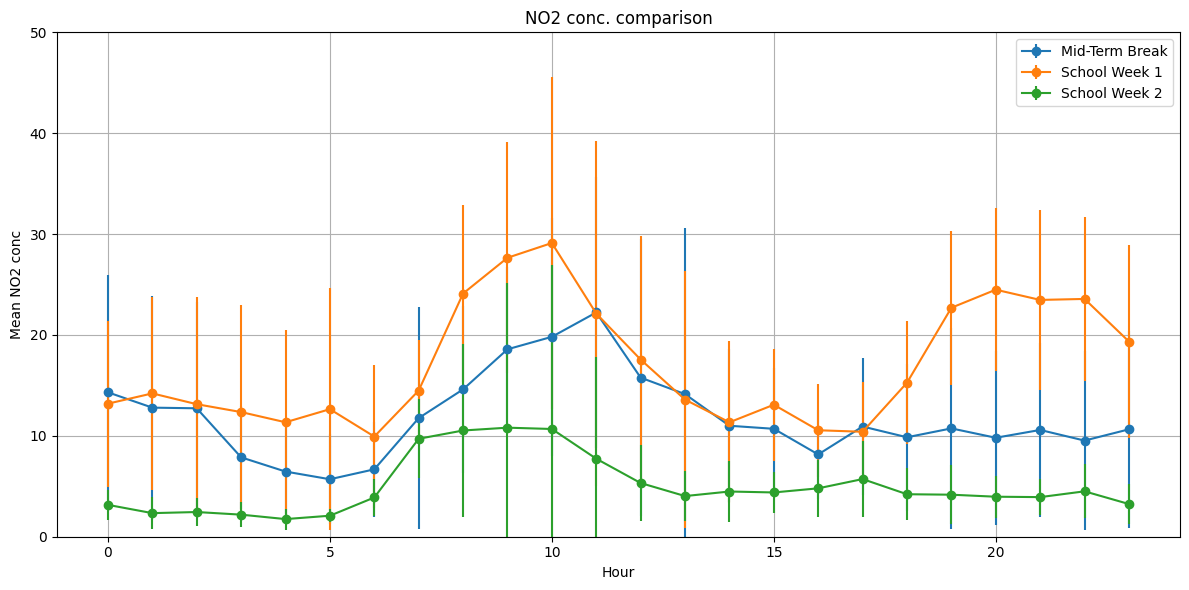

In [25]:
import scipy.stats as stats
# agg_df_c1 = comb_df1.groupby(["week_type", "hour"])["NO2"].agg(['mean', 'std', 'count']).reset_index()
# agg_df_c2 = comb_df2.groupby(["week_type", "hour"])["value"].agg(['mean', 'std', 'count']).reset_index()

agg_df_c1 = comb_df1.groupby(["week_type", "hour"])["NO2"].agg(['mean', 'std', 'count']).reset_index()

agg_df_c1['sem'] = agg_df_c1['std'] / agg_df_c1['count']**0.5  # Standard error
agg_df_c1['ci95'] = agg_df_c1['sem'] * stats.t.ppf(0.975, df=agg_df_c1['count'] - 1)

pivot_mean = agg_df_c1.pivot(index='hour', columns='week_type', values='mean')
pivot_ci = agg_df_c1.pivot(index='hour', columns='week_type', values='ci95')

pivot_df = agg_df_c1.pivot(index='hour', columns='week_type', values='mean')
stds = agg_df_c1.pivot(index='hour', columns='week_type', values='std')

plt.figure(figsize=(12,6))
for week in pivot_df.columns:
    plt.errorbar(pivot_df.index,
                 pivot_df[week],
                 yerr=stds[week],
                 fmt='-o',
                 label=week)

plt.title("NO2 conc. comparison")
plt.xlabel("Hour")
plt.ylabel("Mean NO2 conc")
plt.legend()
plt.grid(True)
plt.ylim((0,50))
plt.tight_layout()
plt.show()


In [26]:
no2_patrick

,Timestamp,NO2,hour,date
0,2022-01-01 00:00:00+00:00,2.80,0,2022-01-01
1,2022-01-01 01:00:00+00:00,2.43,1,2022-01-01
2,2022-01-01 02:00:00+00:00,2.26,2,2022-01-01
3,2022-01-01 03:00:00+00:00,2.33,3,2022-01-01
4,2022-01-01 04:00:00+00:00,1.84,4,2022-01-01
...,...,...,...,...
22400,2024-12-07 19:00:00+00:00,6.95,19,2024-12-07
22401,2024-12-07 20:00:00+00:00,7.00,20,2024-12-07
22402,2024-12-07 21:00:00+00:00,6.89,21,2024-12-07
22403,2024-12-07 22:00:00+00:00,6.59,22,2024-12-07


In [5]:
no2_patrick=pd.read_csv('../mydata/hourly_NO2_streets/UCC_hourly_NO2.csv')
no2_patrick.head()
no2_patrick['hour']=pd.to_datetime(no2_patrick['Timestamp'], format="%d-%m-%Y %H:%M").dt.hour
no2_patrick['date']=pd.to_datetime(no2_patrick['Timestamp'], format="%d-%m-%Y %H:%M").dt.date
no2_patrick

,Timestamp,NO2,hour,date
0,07-01-2020 00:00,1.89,0,2020-01-07
1,07-01-2020 01:00,1.79,1,2020-01-07
2,07-01-2020 02:00,1.64,2,2020-01-07
3,07-01-2020 03:00,1.78,3,2020-01-07
4,07-01-2020 04:00,2.06,4,2020-01-07
...,...,...,...,...
43123,07-12-2024 19:00,6.95,19,2024-12-07
43124,07-12-2024 20:00,7.00,20,2024-12-07
43125,07-12-2024 21:00,6.89,21,2024-12-07
43126,07-12-2024 22:00,6.59,22,2024-12-07


In [6]:
no2_patrick.dropna(subset=['NO2'], inplace=True)
no2_patrick.reset_index(inplace=True)
no2_patrick

,index,Timestamp,NO2,hour,date
0,0,07-01-2020 00:00,1.89,0,2020-01-07
1,1,07-01-2020 01:00,1.79,1,2020-01-07
2,2,07-01-2020 02:00,1.64,2,2020-01-07
3,3,07-01-2020 03:00,1.78,3,2020-01-07
4,4,07-01-2020 04:00,2.06,4,2020-01-07
...,...,...,...,...,...
34541,43123,07-12-2024 19:00,6.95,19,2024-12-07
34542,43124,07-12-2024 20:00,7.00,20,2024-12-07
34543,43125,07-12-2024 21:00,6.89,21,2024-12-07
34544,43126,07-12-2024 22:00,6.59,22,2024-12-07


In [7]:
no2_patrick.drop(columns=['index'], axis=1, inplace=True)

In [8]:
no2_patrick

,Timestamp,NO2,hour,date
0,07-01-2020 00:00,1.89,0,2020-01-07
1,07-01-2020 01:00,1.79,1,2020-01-07
2,07-01-2020 02:00,1.64,2,2020-01-07
3,07-01-2020 03:00,1.78,3,2020-01-07
4,07-01-2020 04:00,2.06,4,2020-01-07
...,...,...,...,...
34541,07-12-2024 19:00,6.95,19,2024-12-07
34542,07-12-2024 20:00,7.00,20,2024-12-07
34543,07-12-2024 21:00,6.89,21,2024-12-07
34544,07-12-2024 22:00,6.59,22,2024-12-07


In [27]:
no2_patrick

,Timestamp,NO2,hour,date
0,2022-01-01 00:00:00+00:00,2.80,0,2022-01-01
1,2022-01-01 01:00:00+00:00,2.43,1,2022-01-01
2,2022-01-01 02:00:00+00:00,2.26,2,2022-01-01
3,2022-01-01 03:00:00+00:00,2.33,3,2022-01-01
4,2022-01-01 04:00:00+00:00,1.84,4,2022-01-01
...,...,...,...,...
22400,2024-12-07 19:00:00+00:00,6.95,19,2024-12-07
22401,2024-12-07 20:00:00+00:00,7.00,20,2024-12-07
22402,2024-12-07 21:00:00+00:00,6.89,21,2024-12-07
22403,2024-12-07 22:00:00+00:00,6.59,22,2024-12-07


In [28]:
# no2_patrick.drop(columns=no2_patrick.columns[0], axis=1, inplace=True)
no2_patrick['day_of_week']=pd.to_datetime(no2_patrick['date'], format='%Y-%m-%d').dt.day_of_week

no2_patrick_wdays_only=no2_patrick[~((no2_patrick['day_of_week']==5) | (no2_patrick['day_of_week']==6))]
# no2_patrick_wdays_only

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_474376\2277183921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no2_patrick['day_of_week']=pd.to_datetime(no2_patrick['date'], format='%Y-%m-%d').dt.day_of_week


In [29]:
no2_patrick_wdays_only

,Timestamp,NO2,hour,date,day_of_week
48,2022-01-03 00:00:00+00:00,35.18,0,2022-01-03,0
49,2022-01-03 01:00:00+00:00,27.77,1,2022-01-03,0
50,2022-01-03 02:00:00+00:00,22.19,2,2022-01-03,0
51,2022-01-03 03:00:00+00:00,22.09,3,2022-01-03,0
52,2022-01-03 04:00:00+00:00,19.95,4,2022-01-03,0
...,...,...,...,...,...
22376,2024-12-06 19:00:00+00:00,6.51,19,2024-12-06,4
22377,2024-12-06 20:00:00+00:00,6.43,20,2024-12-06,4
22378,2024-12-06 21:00:00+00:00,7.23,21,2024-12-06,4
22379,2024-12-06 22:00:00+00:00,7.16,22,2024-12-06,4


In [30]:
no2_patrick_wdays_only=no2_patrick_wdays_only[~((no2_patrick_wdays_only['date']==pd.to_datetime('2024-02-05', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2024-01-01', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2024-03-17', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2024-04-01', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2024-05-06', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2024-06-03', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2024-08-05', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2024-10-28', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2024-12-25', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2024-12-26', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2023-01-01', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2023-02-06', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2023-03-17', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2023-04-10', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2023-05-01', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2023-06-05', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2023-08-07', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2023-10-30', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2023-12-25', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2023-12-26', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2022-01-01', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2022-01-03', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2022-03-17', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2022-03-18', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2022-04-18', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2022-05-02', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2022-06-06', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2022-08-01', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2022-10-31', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2022-12-25', format='%Y-%m-%d').date()) |
(no2_patrick_wdays_only['date']==pd.to_datetime('2022-12-26', format='%Y-%m-%d').date()) 
)]

In [31]:
no2_patrick_wdays_only.reset_index(inplace=True)
no2_patrick_wdays_only.drop(columns=['index'],axis=1, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_474376\3566902661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no2_patrick_wdays_only.drop(columns=['index'],axis=1, inplace=True)


In [32]:
no2_patrick_wdays_only

,Timestamp,NO2,hour,date,day_of_week
0,2022-01-04 00:00:00+00:00,7.79,0,2022-01-04,1
1,2022-01-04 01:00:00+00:00,5.54,1,2022-01-04,1
2,2022-01-04 02:00:00+00:00,4.78,2,2022-01-04,1
3,2022-01-04 03:00:00+00:00,4.76,3,2022-01-04,1
4,2022-01-04 04:00:00+00:00,4.35,4,2022-01-04,1
...,...,...,...,...,...
15444,2024-12-06 19:00:00+00:00,6.51,19,2024-12-06,4
15445,2024-12-06 20:00:00+00:00,6.43,20,2024-12-06,4
15446,2024-12-06 21:00:00+00:00,7.23,21,2024-12-06,4
15447,2024-12-06 22:00:00+00:00,7.16,22,2024-12-06,4


In [33]:
from datetime import datetime
summer_break_start1= datetime.strptime("2023-07-01", "%Y-%m-%d").date()
summer_break_end1 = datetime.strptime("2023-08-25", "%Y-%m-%d").date()

summer_break_start2= datetime.strptime("2022-07-01", "%Y-%m-%d").date()
summer_break_end2 = datetime.strptime("2022-08-26", "%Y-%m-%d").date()

summer_break_start3= datetime.strptime("2024-07-01", "%Y-%m-%d").date()
summer_break_end3 = datetime.strptime("2024-08-30", "%Y-%m-%d").date()

###########################################################################

oct_break_start1= datetime.strptime("2023-10-30", "%Y-%m-%d").date()
oct_break_end1 = datetime.strptime("2023-11-03", "%Y-%m-%d").date()

oct_break_start2= datetime.strptime("2022-10-31", "%Y-%m-%d").date()
oct_break_end2 = datetime.strptime("2022-11-04", "%Y-%m-%d").date()

oct_break_start3= datetime.strptime("2024-10-28", "%Y-%m-%d").date()
oct_break_end3 = datetime.strptime("2024-11-01", "%Y-%m-%d").date()

###########################################################################

christmas_break_start1= datetime.strptime("2023-12-23", "%Y-%m-%d").date()
christmas_break_end1 = datetime.strptime("2024-01-07", "%Y-%m-%d").date()

christmas_break_start2= datetime.strptime("2022-01-01", "%Y-%m-%d").date()
christmas_break_end2 = datetime.strptime("2022-01-05", "%Y-%m-%d").date()

christmas_break_start3= datetime.strptime("2022-12-22", "%Y-%m-%d").date()
christmas_break_end3 = datetime.strptime("2023-01-04", "%Y-%m-%d").date()

christmas_break_start4= datetime.strptime("2024-12-21", "%Y-%m-%d").date()
christmas_break_end4 = datetime.strptime("2024-12-31", "%Y-%m-%d").date()

###########################################################################

feb_break_start1= datetime.strptime("2024-02-12", "%Y-%m-%d").date()
feb_break_end1 = datetime.strptime("2024-02-16", "%Y-%m-%d").date()

feb_break_start2= datetime.strptime("2023-02-13", "%Y-%m-%d").date()
feb_break_end2 = datetime.strptime("2023-02-17", "%Y-%m-%d").date()

feb_break_start3= datetime.strptime("2022-02-21", "%Y-%m-%d").date()
feb_break_end3 = datetime.strptime("2022-02-25", "%Y-%m-%d").date()


###########################################################################

easter_break_start1= datetime.strptime("2024-03-23", "%Y-%m-%d").date()
easter_break_end1 = datetime.strptime("2024-04-07", "%Y-%m-%d").date()

easter_break_start2= datetime.strptime("2023-04-01", "%Y-%m-%d").date()
easter_break_end2 = datetime.strptime("2023-04-16", "%Y-%m-%d").date()

easter_break_start3= datetime.strptime("2022-04-09", "%Y-%m-%d").date()
easter_break_end3 = datetime.strptime("2022-04-24", "%Y-%m-%d").date()

###########################################################################

summer_break=no2_patrick_wdays_only[((no2_patrick_wdays_only['date']>=summer_break_start1) & (no2_patrick_wdays_only['date']<=summer_break_end1)) |
                                    ((no2_patrick_wdays_only['date']>=summer_break_start2) & (no2_patrick_wdays_only['date']<=summer_break_end2)) |
                                    ((no2_patrick_wdays_only['date']>=summer_break_start3) & (no2_patrick_wdays_only['date']<=summer_break_end3))]


oct_break=no2_patrick_wdays_only[((no2_patrick_wdays_only['date']>=oct_break_start1) & (no2_patrick_wdays_only['date']<=oct_break_end1)) |
                                 ((no2_patrick_wdays_only['date']>=oct_break_start2) & (no2_patrick_wdays_only['date']<=oct_break_end2)) |
                                 ((no2_patrick_wdays_only['date']>=oct_break_start3) & (no2_patrick_wdays_only['date']<=oct_break_end3))]

christmas_break=no2_patrick_wdays_only[((no2_patrick_wdays_only['date']>=christmas_break_start1) & (no2_patrick_wdays_only['date']<=christmas_break_end1)) |
                                       ((no2_patrick_wdays_only['date']>=christmas_break_start2) & (no2_patrick_wdays_only['date']<=christmas_break_end2)) |
                                       ((no2_patrick_wdays_only['date']>=christmas_break_start3) & (no2_patrick_wdays_only['date']<=christmas_break_end3)) |
                                       ((no2_patrick_wdays_only['date']>=christmas_break_start4) & (no2_patrick_wdays_only['date']<=christmas_break_end4))]

feb_break=no2_patrick_wdays_only[((no2_patrick_wdays_only['date']>=feb_break_start1) & (no2_patrick_wdays_only['date']<=feb_break_end1)) |
                                 ((no2_patrick_wdays_only['date']>=feb_break_start2) & (no2_patrick_wdays_only['date']<=feb_break_end2)) |
                                 ((no2_patrick_wdays_only['date']>=feb_break_start1) & (no2_patrick_wdays_only['date']<=feb_break_end3))]


easter_break=no2_patrick_wdays_only[((no2_patrick_wdays_only['date']>=easter_break_start1) & (no2_patrick_wdays_only['date']<=easter_break_end1)) |
                                    ((no2_patrick_wdays_only['date']>=easter_break_start2) & (no2_patrick_wdays_only['date']<=easter_break_end2)) |
                                    ((no2_patrick_wdays_only['date']>=easter_break_start3) & (no2_patrick_wdays_only['date']<=easter_break_end3)) ]

summer_break['Week_Type']='Summer Break'
oct_break['Week_Type']='October Mid Term Break'
christmas_break['Week_Type']='Christmas Break'
feb_break['Week_Type']='February Mid Term Break'
easter_break['Week_Type']='Easter Break'

term_breaks=pd.concat([summer_break,oct_break,christmas_break,feb_break,easter_break])

term_breaks

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_474376\2158818384.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_break['Week_Type']='Summer Break'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_474376\2158818384.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oct_break['Week_Type']='October Mid Term Break'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_474376\2158818384.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,Timestamp,NO2,hour,date,day_of_week,Week_Type
2945,2022-07-01 00:00:00+01:00,3.61,0,2022-07-01,4,Summer Break
2946,2022-07-01 01:00:00+01:00,2.95,1,2022-07-01,4,Summer Break
2947,2022-07-01 02:00:00+01:00,3.38,2,2022-07-01,4,Summer Break
2948,2022-07-01 03:00:00+01:00,1.56,3,2022-07-01,4,Summer Break
2949,2022-07-01 04:00:00+01:00,1.13,4,2022-07-01,4,Summer Break
...,...,...,...,...,...,...
13312,2024-04-05 19:00:00+01:00,6.95,19,2024-04-05,4,Easter Break
13313,2024-04-05 20:00:00+01:00,6.88,20,2024-04-05,4,Easter Break
13314,2024-04-05 21:00:00+01:00,6.74,21,2024-04-05,4,Easter Break
13315,2024-04-05 22:00:00+01:00,10.23,22,2024-04-05,4,Easter Break


In [34]:
school_days=no2_patrick_wdays_only[
    ~(((no2_patrick_wdays_only['date']>=summer_break_start1) & (no2_patrick_wdays_only['date']<=summer_break_end1)) |
    ((no2_patrick_wdays_only['date']>=summer_break_start2) & (no2_patrick_wdays_only['date']<=summer_break_end2)) |
    ((no2_patrick_wdays_only['date']>=summer_break_start3) & (no2_patrick_wdays_only['date']<=summer_break_end3)) |
    ((no2_patrick_wdays_only['date']>=oct_break_start1) & (no2_patrick_wdays_only['date']<=oct_break_end1)) |
    ((no2_patrick_wdays_only['date']>=oct_break_start2) & (no2_patrick_wdays_only['date']<=oct_break_end2)) |
    ((no2_patrick_wdays_only['date']>=oct_break_start3) & (no2_patrick_wdays_only['date']<=oct_break_end3)) |
    ((no2_patrick_wdays_only['date']>=christmas_break_start1) & (no2_patrick_wdays_only['date']<=christmas_break_end1)) |
    ((no2_patrick_wdays_only['date']>=christmas_break_start2) & (no2_patrick_wdays_only['date']<=christmas_break_end2)) |
    ((no2_patrick_wdays_only['date']>=christmas_break_start3) & (no2_patrick_wdays_only['date']<=christmas_break_end3)) |
    ((no2_patrick_wdays_only['date']>=christmas_break_start4) & (no2_patrick_wdays_only['date']<=christmas_break_end4)) |
    ((no2_patrick_wdays_only['date']>=feb_break_start1) & (no2_patrick_wdays_only['date']<=feb_break_end1)) |
    ((no2_patrick_wdays_only['date']>=feb_break_start2) & (no2_patrick_wdays_only['date']<=feb_break_end2)) |
    ((no2_patrick_wdays_only['date']>=feb_break_start1) & (no2_patrick_wdays_only['date']<=feb_break_end3)) |
    ((no2_patrick_wdays_only['date']>=easter_break_start1) & (no2_patrick_wdays_only['date']<=easter_break_end1)) |
    ((no2_patrick_wdays_only['date']>=easter_break_start2) & (no2_patrick_wdays_only['date']<=easter_break_end2)) |
    ((no2_patrick_wdays_only['date']>=easter_break_start3) & (no2_patrick_wdays_only['date']<=easter_break_end3)) |
    (no2_patrick_wdays_only['date']<=datetime.strptime("2021-12-31", "%Y-%m-%d").date()))
    ]


In [35]:
school_days.reset_index(inplace=True)
school_days

,index,Timestamp,NO2,hour,date,day_of_week
0,48,2022-01-06 00:00:00+00:00,5.20,0,2022-01-06,3
1,49,2022-01-06 01:00:00+00:00,5.18,1,2022-01-06,3
2,50,2022-01-06 02:00:00+00:00,3.66,2,2022-01-06,3
3,51,2022-01-06 03:00:00+00:00,4.37,3,2022-01-06,3
4,52,2022-01-06 04:00:00+00:00,4.90,4,2022-01-06,3
...,...,...,...,...,...,...
11515,15444,2024-12-06 19:00:00+00:00,6.51,19,2024-12-06,4
11516,15445,2024-12-06 20:00:00+00:00,6.43,20,2024-12-06,4
11517,15446,2024-12-06 21:00:00+00:00,7.23,21,2024-12-06,4
11518,15447,2024-12-06 22:00:00+00:00,7.16,22,2024-12-06,4


In [36]:
term_breaks.reset_index(inplace=True)

In [37]:
school_days.drop(columns=['index'], axis=1, inplace=True)
term_breaks.drop(columns=['index'], axis=1, inplace=True)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_474376\3531627988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_days.drop(columns=['index'], axis=1, inplace=True)


In [38]:
school_days['Week_Type']='School Working Days'

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_474376\2320236355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_days['Week_Type']='School Working Days'


In [ ]:
school_days

,Timestamp,NO2,hour,date,day_of_week,Week_Type
0,2022-01-06 00:00:00+00:00,5.20,0,2022-01-06,3,School Working Days
1,2022-01-06 01:00:00+00:00,5.18,1,2022-01-06,3,School Working Days
2,2022-01-06 02:00:00+00:00,3.66,2,2022-01-06,3,School Working Days
3,2022-01-06 03:00:00+00:00,4.37,3,2022-01-06,3,School Working Days
4,2022-01-06 04:00:00+00:00,4.90,4,2022-01-06,3,School Working Days
...,...,...,...,...,...,...
11515,2024-12-06 19:00:00+00:00,6.51,19,2024-12-06,4,School Working Days
11516,2024-12-06 20:00:00+00:00,6.43,20,2024-12-06,4,School Working Days
11517,2024-12-06 21:00:00+00:00,7.23,21,2024-12-06,4,School Working Days
11518,2024-12-06 22:00:00+00:00,7.16,22,2024-12-06,4,School Working Days


In [40]:
term_breaks

,Timestamp,NO2,hour,date,day_of_week,Week_Type
0,2022-07-01 00:00:00+01:00,3.61,0,2022-07-01,4,Summer Break
1,2022-07-01 01:00:00+01:00,2.95,1,2022-07-01,4,Summer Break
2,2022-07-01 02:00:00+01:00,3.38,2,2022-07-01,4,Summer Break
3,2022-07-01 03:00:00+01:00,1.56,3,2022-07-01,4,Summer Break
4,2022-07-01 04:00:00+01:00,1.13,4,2022-07-01,4,Summer Break
...,...,...,...,...,...,...
3924,2024-04-05 19:00:00+01:00,6.95,19,2024-04-05,4,Easter Break
3925,2024-04-05 20:00:00+01:00,6.88,20,2024-04-05,4,Easter Break
3926,2024-04-05 21:00:00+01:00,6.74,21,2024-04-05,4,Easter Break
3927,2024-04-05 22:00:00+01:00,10.23,22,2024-04-05,4,Easter Break


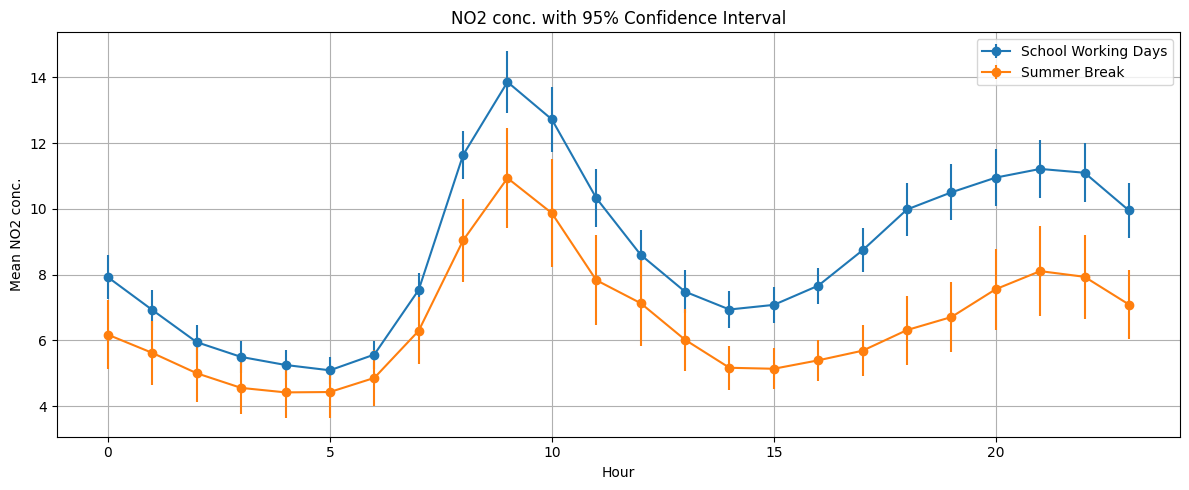

In [41]:
################################### summer break ######################################
comb_df=pd.concat([summer_break, school_days])

comb_df['date']=pd.to_datetime(comb_df['date'])
# how to sort a dataframe based on a column in python?
comb_df_sorted = comb_df.sort_values(by='date')
comb_df_sorted


comb_df_sorted.reset_index(inplace=True)
comb_df_sorted

comb_df_sorted['hour']=pd.to_datetime(comb_df_sorted['Timestamp']).dt.hour
agg_df_c1 = comb_df_sorted.groupby(["Week_Type", "hour"])["NO2"].agg(['mean', 'std', 'count']).reset_index()

agg_df_c1['sem'] = agg_df_c1['std'] / agg_df_c1['count']**0.5  # Standard error
agg_df_c1['ci95'] = agg_df_c1['sem'] * stats.t.ppf(0.975, df=agg_df_c1['count'] - 1)


pivot_mean = agg_df_c1.pivot(index='hour', columns='Week_Type', values='mean')
pivot_ci = agg_df_c1.pivot(index='hour', columns='Week_Type', values='ci95')

plt.figure(figsize=(12,5))
for week in pivot_mean.columns:
    plt.errorbar(pivot_mean.index,
                 pivot_mean[week],
                 yerr=pivot_ci[week],
                 fmt='-o',
                 label=week)
    
plt.title("NO2 conc. with 95% Confidence Interval")
plt.xlabel("Hour")
plt.ylabel("Mean NO2 conc.")
plt.legend()
plt.grid(True)
plt.tight_layout()



In [42]:
agg_df_c1

,Week_Type,hour,mean,std,count,sem,ci95
0,School Working Days,0,7.922280,7.463617,478,0.341378,0.670790
1,School Working Days,1,6.926604,6.886590,480,0.314328,0.617633
2,School Working Days,2,5.948714,5.946754,482,0.270867,0.532229
3,School Working Days,3,5.500083,5.442124,482,0.247882,0.487065
4,School Working Days,4,5.255333,5.017266,480,0.229006,0.449980
5,School Working Days,5,5.093382,4.639176,482,0.211309,0.415202
6,School Working Days,6,5.571722,4.770726,482,0.217301,0.426976
7,School Working Days,7,7.537609,5.719521,481,0.260788,0.512427
8,School Working Days,8,11.638062,8.279764,480,0.377918,0.742582
9,School Working Days,9,13.858625,10.604980,480,0.484049,0.951122


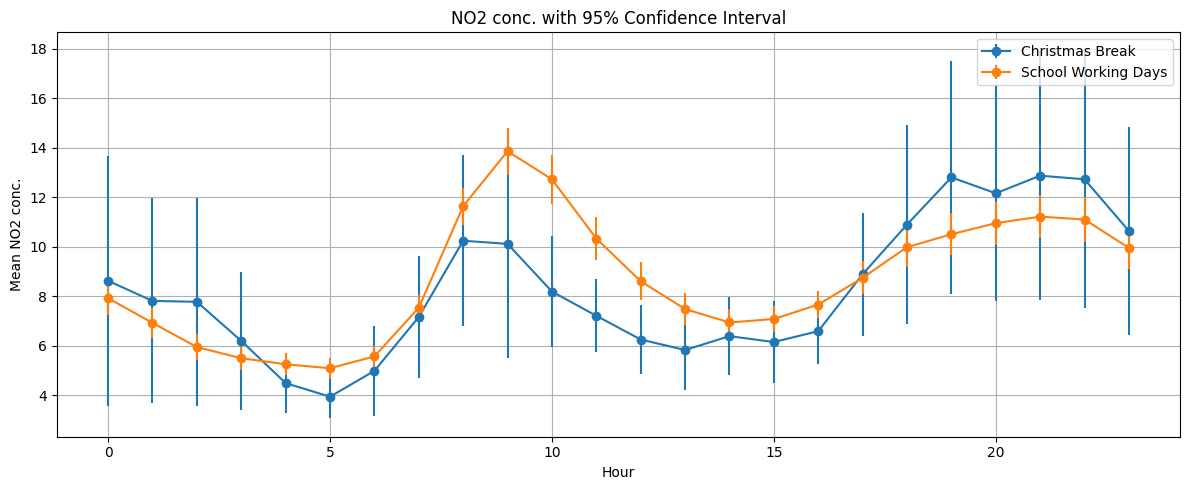

In [43]:
################################### christmas break ######################################
comb_df=pd.concat([christmas_break, school_days])


comb_df['Timestamp']=pd.to_datetime(comb_df['Timestamp'])
# how to sort a dataframe based on a column in python?
comb_df_sorted = comb_df.sort_values(by='Timestamp')
comb_df_sorted


comb_df_sorted.reset_index(inplace=True)
comb_df_sorted

comb_df_sorted['hour']=pd.to_datetime(comb_df_sorted['Timestamp']).dt.hour
agg_df_c1 = comb_df_sorted.groupby(["Week_Type", "hour"])["NO2"].agg(['mean', 'std', 'count']).reset_index()

agg_df_c1['sem'] = agg_df_c1['std'] / agg_df_c1['count']**0.5  # Standard error
agg_df_c1['ci95'] = agg_df_c1['sem'] * stats.t.ppf(0.975, df=agg_df_c1['count'] - 1)


pivot_mean = agg_df_c1.pivot(index='hour', columns='Week_Type', values='mean')
pivot_ci = agg_df_c1.pivot(index='hour', columns='Week_Type', values='ci95')

plt.figure(figsize=(12,5))
for week in pivot_mean.columns:
    plt.errorbar(pivot_mean.index,
                 pivot_mean[week],
                 yerr=pivot_ci[week],
                 fmt='-o',
                 label=week)
    
plt.title("NO2 conc. with 95% Confidence Interval")
plt.xlabel("Hour")
plt.ylabel("Mean NO2 conc.")
plt.legend()
plt.grid(True)
plt.tight_layout()


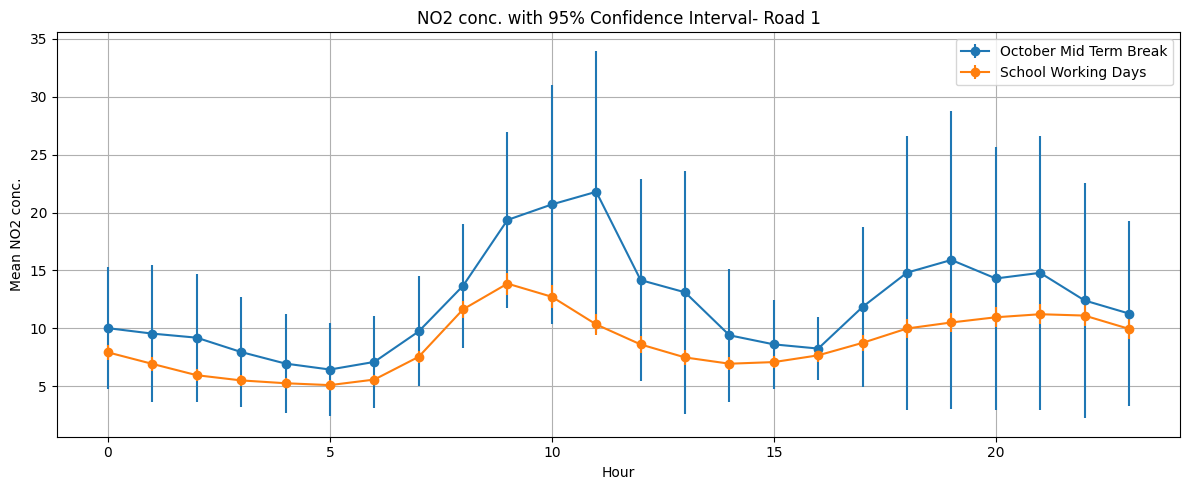

In [45]:
################################### october break ######################################
comb_df=pd.concat([oct_break, school_days])

comb_df['Timestamp']=pd.to_datetime(comb_df['Timestamp'])
# how to sort a dataframe based on a column in python?
comb_df_sorted = comb_df.sort_values(by='Timestamp')
comb_df_sorted

comb_df_sorted.reset_index(inplace=True)
comb_df_sorted

comb_df_sorted['hour']=pd.to_datetime(comb_df_sorted['Timestamp']).dt.hour
agg_df_c1 = comb_df_sorted.groupby(["Week_Type", "hour"])["NO2"].agg(['mean', 'std', 'count']).reset_index()

agg_df_c1['sem'] = agg_df_c1['std'] / agg_df_c1['count']**0.5  # Standard error
agg_df_c1['ci95'] = agg_df_c1['sem'] * stats.t.ppf(0.975, df=agg_df_c1['count'] - 1)

pivot_mean = agg_df_c1.pivot(index='hour', columns='Week_Type', values='mean')
pivot_ci = agg_df_c1.pivot(index='hour', columns='Week_Type', values='ci95')


plt.figure(figsize=(12,5))

for week in pivot_mean.columns:
    plt.errorbar(pivot_mean.index,
                 pivot_mean[week],
                 yerr=pivot_ci[week],
                 fmt='-o',
                 label=week)
    
plt.title("NO2 conc. with 95% Confidence Interval- Road 1")
plt.xlabel("Hour")
plt.ylabel("Mean NO2 conc.")
plt.legend()
plt.grid(True)
plt.tight_layout()



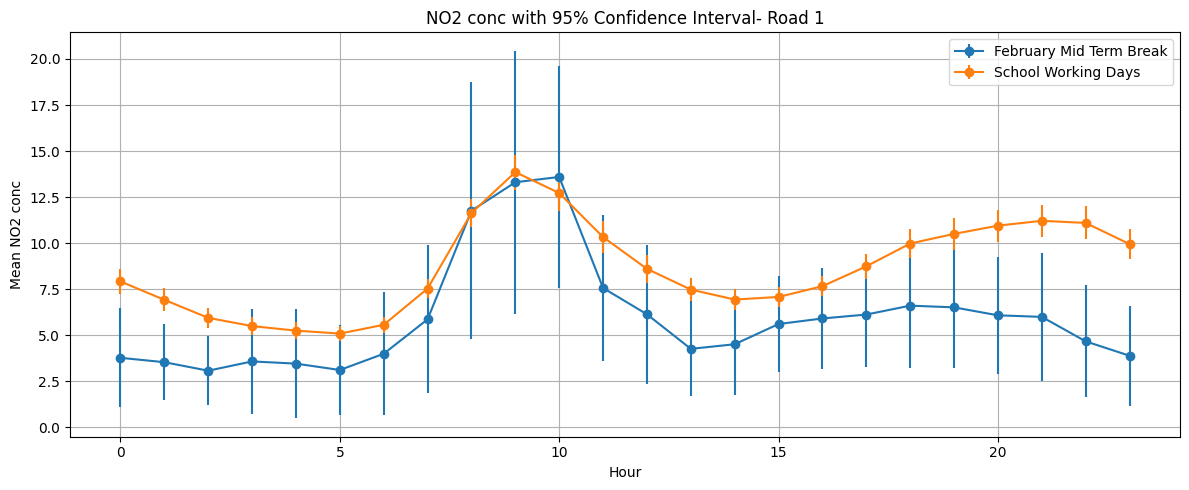

In [46]:
################################### feb break ######################################
comb_df=pd.concat([feb_break, school_days])

comb_df['Timestamp']=pd.to_datetime(comb_df['Timestamp'])
# how to sort a dataframe based on a column in python?
comb_df_sorted = comb_df.sort_values(by='Timestamp')
comb_df_sorted


comb_df_sorted.reset_index(inplace=True)
comb_df_sorted

comb_df_sorted['hour']=pd.to_datetime(comb_df_sorted['Timestamp']).dt.hour
agg_df_c1 = comb_df_sorted.groupby(["Week_Type", "hour"])["NO2"].agg(['mean', 'std', 'count']).reset_index()


agg_df_c1['sem'] = agg_df_c1['std'] / agg_df_c1['count']**0.5  # Standard error
agg_df_c1['ci95'] = agg_df_c1['sem'] * stats.t.ppf(0.975, df=agg_df_c1['count'] - 1)

pivot_mean = agg_df_c1.pivot(index='hour', columns='Week_Type', values='mean')
pivot_ci = agg_df_c1.pivot(index='hour', columns='Week_Type', values='ci95')

plt.figure(figsize=(12,5))
for week in pivot_mean.columns:
    plt.errorbar(pivot_mean.index,
                 pivot_mean[week],
                 yerr=pivot_ci[week],
                 fmt='-o',
                 label=week)
    
plt.title("NO2 conc with 95% Confidence Interval- Road 1")
plt.xlabel("Hour")
plt.ylabel("Mean NO2 conc")
plt.legend()
plt.grid(True)
plt.tight_layout()


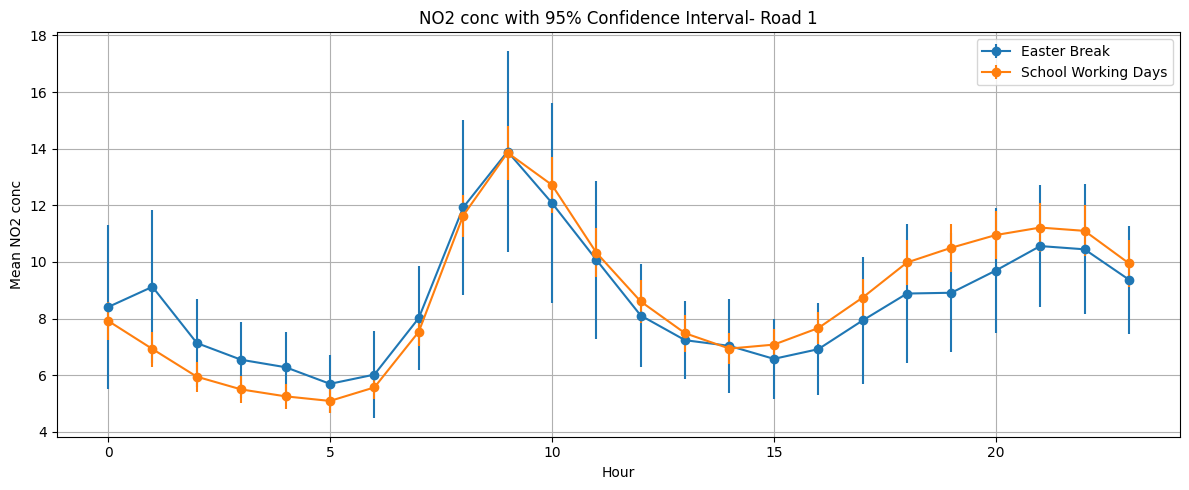

In [47]:
################################### easter break ######################################
comb_df=pd.concat([easter_break, school_days])

comb_df['Timestamp']=pd.to_datetime(comb_df['Timestamp'])
# how to sort a dataframe based on a column in python?
comb_df_sorted = comb_df.sort_values(by='Timestamp')
comb_df_sorted


comb_df_sorted.reset_index(inplace=True)
comb_df_sorted

comb_df_sorted['hour']=pd.to_datetime(comb_df_sorted['Timestamp']).dt.hour
agg_df_c1 = comb_df_sorted.groupby(["Week_Type", "hour"])["NO2"].agg(['mean', 'std', 'count']).reset_index()

agg_df_c1['sem'] = agg_df_c1['std'] / agg_df_c1['count']**0.5  # Standard error
agg_df_c1['ci95'] = agg_df_c1['sem'] * stats.t.ppf(0.975, df=agg_df_c1['count'] - 1)

pivot_mean = agg_df_c1.pivot(index='hour', columns='Week_Type', values='mean')
pivot_ci = agg_df_c1.pivot(index='hour', columns='Week_Type', values='ci95')


plt.figure(figsize=(12,5))
for week in pivot_mean.columns:
    plt.errorbar(pivot_mean.index,
                 pivot_mean[week],
                 yerr=pivot_ci[week],
                 fmt='-o',
                 label=week)
    
plt.title("NO2 conc with 95% Confidence Interval- Road 1")
plt.xlabel("Hour")
plt.ylabel("Mean NO2 conc")
plt.legend()
plt.grid(True)
plt.tight_layout()

In [48]:
term_breaks2=term_breaks[['Timestamp','NO2','hour','date']]
term_breaks2['Week_Type']='School Holiday'

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_474376\3128739659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  term_breaks2['Week_Type']='School Holiday'


In [49]:
term_breaks2

,Timestamp,NO2,hour,date,Week_Type
0,2022-07-01 00:00:00+01:00,3.61,0,2022-07-01,School Holiday
1,2022-07-01 01:00:00+01:00,2.95,1,2022-07-01,School Holiday
2,2022-07-01 02:00:00+01:00,3.38,2,2022-07-01,School Holiday
3,2022-07-01 03:00:00+01:00,1.56,3,2022-07-01,School Holiday
4,2022-07-01 04:00:00+01:00,1.13,4,2022-07-01,School Holiday
...,...,...,...,...,...
3924,2024-04-05 19:00:00+01:00,6.95,19,2024-04-05,School Holiday
3925,2024-04-05 20:00:00+01:00,6.88,20,2024-04-05,School Holiday
3926,2024-04-05 21:00:00+01:00,6.74,21,2024-04-05,School Holiday
3927,2024-04-05 22:00:00+01:00,10.23,22,2024-04-05,School Holiday


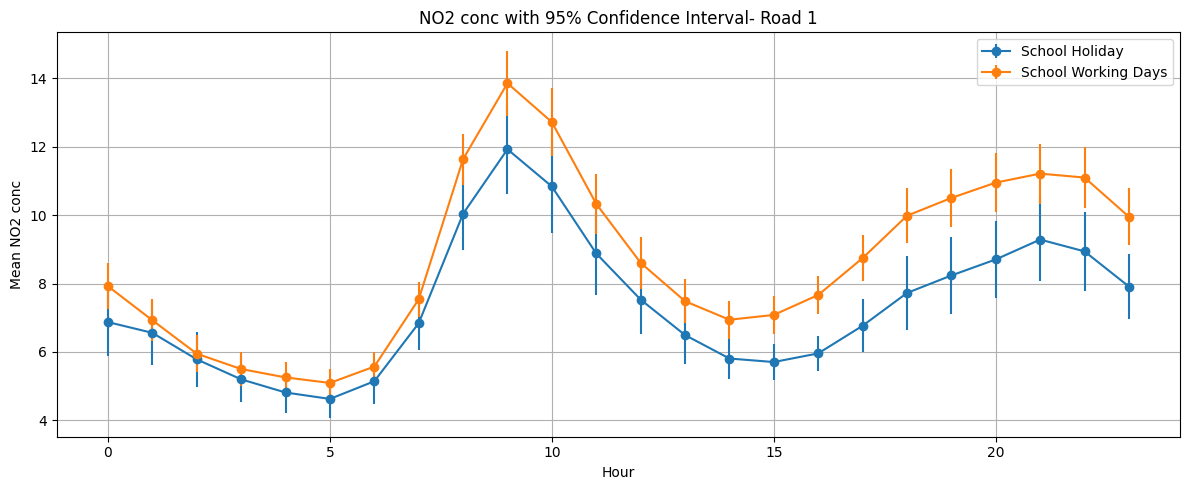

In [50]:
################################### working days vs  break ######################################
comb_df=pd.concat([term_breaks2, school_days])

comb_df['Timestamp']=pd.to_datetime(comb_df['Timestamp'])
# how to sort a dataframe based on a column in python?
comb_df_sorted = comb_df.sort_values(by='Timestamp')
comb_df_sorted


comb_df_sorted.reset_index(inplace=True)
comb_df_sorted

comb_df_sorted['hour']=pd.to_datetime(comb_df_sorted['Timestamp']).dt.hour
agg_df_c1 = comb_df_sorted.groupby(["Week_Type", "hour"])["NO2"].agg(['mean', 'std', 'count']).reset_index()

agg_df_c1['sem'] = agg_df_c1['std'] / agg_df_c1['count']**0.5  # Standard error
agg_df_c1['ci95'] = agg_df_c1['sem'] * stats.t.ppf(0.975, df=agg_df_c1['count'] - 1)

pivot_mean = agg_df_c1.pivot(index='hour', columns='Week_Type', values='mean')
pivot_ci = agg_df_c1.pivot(index='hour', columns='Week_Type', values='ci95')


plt.figure(figsize=(12,5))
for week in pivot_mean.columns:
    plt.errorbar(pivot_mean.index,
                 pivot_mean[week],
                 yerr=pivot_ci[week],
                 fmt='-o',
                 label=week)
    
plt.title("NO2 conc with 95% Confidence Interval- Road 1")
plt.xlabel("Hour")
plt.ylabel("Mean NO2 conc")
plt.legend()
plt.grid(True)
plt.tight_layout()

In [51]:
no2_patrick

,Timestamp,NO2,hour,date,day_of_week
0,2022-01-01 00:00:00+00:00,2.80,0,2022-01-01,5
1,2022-01-01 01:00:00+00:00,2.43,1,2022-01-01,5
2,2022-01-01 02:00:00+00:00,2.26,2,2022-01-01,5
3,2022-01-01 03:00:00+00:00,2.33,3,2022-01-01,5
4,2022-01-01 04:00:00+00:00,1.84,4,2022-01-01,5
...,...,...,...,...,...
22400,2024-12-07 19:00:00+00:00,6.95,19,2024-12-07,5
22401,2024-12-07 20:00:00+00:00,7.00,20,2024-12-07,5
22402,2024-12-07 21:00:00+00:00,6.89,21,2024-12-07,5
22403,2024-12-07 22:00:00+00:00,6.59,22,2024-12-07,5


In [52]:
no2_patrick_wdays_only

,Timestamp,NO2,hour,date,day_of_week
0,2022-01-04 00:00:00+00:00,7.79,0,2022-01-04,1
1,2022-01-04 01:00:00+00:00,5.54,1,2022-01-04,1
2,2022-01-04 02:00:00+00:00,4.78,2,2022-01-04,1
3,2022-01-04 03:00:00+00:00,4.76,3,2022-01-04,1
4,2022-01-04 04:00:00+00:00,4.35,4,2022-01-04,1
...,...,...,...,...,...
15444,2024-12-06 19:00:00+00:00,6.51,19,2024-12-06,4
15445,2024-12-06 20:00:00+00:00,6.43,20,2024-12-06,4
15446,2024-12-06 21:00:00+00:00,7.23,21,2024-12-06,4
15447,2024-12-06 22:00:00+00:00,7.16,22,2024-12-06,4


In [53]:
apr_oct_start_2022=pd.to_datetime('2022-04-01',format='%Y-%m-%d').date()
apr_oct_end_2022=pd.to_datetime('2022-09-30',format='%Y-%m-%d').date()

apr_oct_start_2023=pd.to_datetime('2023-04-01',format='%Y-%m-%d').date()
apr_oct_end_2023=pd.to_datetime('2023-09-30',format='%Y-%m-%d').date()

apr_oct_start_2024=pd.to_datetime('2024-04-01',format='%Y-%m-%d').date()
apr_oct_end_2024=pd.to_datetime('2024-09-30',format='%Y-%m-%d').date()



nov_mar_start_2022_2=pd.to_datetime('2022-01-01',format='%Y-%m-%d').date()
nov_mar_end_2022_2=pd.to_datetime('2022-03-31',format='%Y-%m-%d').date()

nov_mar_start_2022=pd.to_datetime('2022-10-01',format='%Y-%m-%d').date()
nov_mar_end_2022=pd.to_datetime('2023-03-31',format='%Y-%m-%d').date()

nov_mar_start_2023=pd.to_datetime('2023-10-01',format='%Y-%m-%d').date()
nov_mar_end_2023=pd.to_datetime('2024-03-31',format='%Y-%m-%d').date()

nov_mar_start_2024=pd.to_datetime('2024-10-01',format='%Y-%m-%d').date()
nov_mar_end_2024=pd.to_datetime('2024-12-31',format='%Y-%m-%d').date()




In [54]:
from datetime import datetime
apr_oct_months=no2_patrick_wdays_only[
    (((no2_patrick_wdays_only['date']>=apr_oct_start_2022) & (no2_patrick_wdays_only['date']<=apr_oct_end_2022)) |
    ((no2_patrick_wdays_only['date']>=apr_oct_start_2023) & (no2_patrick_wdays_only['date']<=apr_oct_end_2023)) |
    ((no2_patrick_wdays_only['date']>=apr_oct_start_2024) & (no2_patrick_wdays_only['date']<=apr_oct_end_2024))) &
    (no2_patrick_wdays_only['date']>=datetime.strptime("2021-12-31", "%Y-%m-%d").date())
    ]


In [55]:
nov_mar_months=no2_patrick_wdays_only[
    (((no2_patrick_wdays_only['date']>=nov_mar_start_2022) & (no2_patrick_wdays_only['date']<=nov_mar_end_2022)) |
    ((no2_patrick_wdays_only['date']>=nov_mar_start_2023) & (no2_patrick_wdays_only['date']<=nov_mar_end_2023)) |
    ((no2_patrick_wdays_only['date']>=nov_mar_start_2024) & (no2_patrick_wdays_only['date']<=nov_mar_end_2024)) |
    ((no2_patrick_wdays_only['date']>=nov_mar_start_2022_2) & (no2_patrick_wdays_only['date']<=nov_mar_end_2022_2))) &
    (no2_patrick_wdays_only['date']>=datetime.strptime("2021-12-31", "%Y-%m-%d").date())
    ]

In [56]:
apr_oct_months['period']='APRIL TO SEPTEMBER'
nov_mar_months['period']='OCTOBER TO MARCH'

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_474376\1322876108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apr_oct_months['period']='APRIL TO SEPTEMBER'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_474376\1322876108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nov_mar_months['period']='OCTOBER TO MARCH'


In [57]:
apr_oct_months

,Timestamp,NO2,hour,date,day_of_week,period
1458,2022-04-01 00:00:00+01:00,12.91,0,2022-04-01,4,APRIL TO SEPTEMBER
1459,2022-04-01 01:00:00+01:00,1.96,1,2022-04-01,4,APRIL TO SEPTEMBER
1460,2022-04-01 02:00:00+01:00,1.74,2,2022-04-01,4,APRIL TO SEPTEMBER
1461,2022-04-01 03:00:00+01:00,1.56,3,2022-04-01,4,APRIL TO SEPTEMBER
1462,2022-04-01 04:00:00+01:00,1.13,4,2022-04-01,4,APRIL TO SEPTEMBER
...,...,...,...,...,...,...
15086,2024-09-06 19:00:00+01:00,6.66,19,2024-09-06,4,APRIL TO SEPTEMBER
15087,2024-09-06 20:00:00+01:00,6.34,20,2024-09-06,4,APRIL TO SEPTEMBER
15088,2024-09-06 21:00:00+01:00,6.62,21,2024-09-06,4,APRIL TO SEPTEMBER
15089,2024-09-06 22:00:00+01:00,6.41,22,2024-09-06,4,APRIL TO SEPTEMBER


In [58]:
comb_df=pd.concat([apr_oct_months, nov_mar_months])
comb_df.reset_index(inplace=True)
comb_df.drop(columns=['index'],axis=1,inplace=True)
comb_df

,Timestamp,NO2,hour,date,day_of_week,period
0,2022-04-01 00:00:00+01:00,12.91,0,2022-04-01,4,APRIL TO SEPTEMBER
1,2022-04-01 01:00:00+01:00,1.96,1,2022-04-01,4,APRIL TO SEPTEMBER
2,2022-04-01 02:00:00+01:00,1.74,2,2022-04-01,4,APRIL TO SEPTEMBER
3,2022-04-01 03:00:00+01:00,1.56,3,2022-04-01,4,APRIL TO SEPTEMBER
4,2022-04-01 04:00:00+01:00,1.13,4,2022-04-01,4,APRIL TO SEPTEMBER
...,...,...,...,...,...,...
15444,2024-12-06 19:00:00+00:00,6.51,19,2024-12-06,4,OCTOBER TO MARCH
15445,2024-12-06 20:00:00+00:00,6.43,20,2024-12-06,4,OCTOBER TO MARCH
15446,2024-12-06 21:00:00+00:00,7.23,21,2024-12-06,4,OCTOBER TO MARCH
15447,2024-12-06 22:00:00+00:00,7.16,22,2024-12-06,4,OCTOBER TO MARCH


In [59]:
comb_df['Timestamp']=pd.to_datetime(comb_df['Timestamp'], format='%d-%m-%Y %H:%M')
# how to sort a dataframe based on a column in python?
comb_df_sorted = comb_df.sort_values(by='Timestamp')
comb_df_sorted


comb_df_sorted.reset_index(inplace=True)
comb_df_sorted

,index,Timestamp,NO2,hour,date,day_of_week,period
0,7936,2022-01-04 00:00:00+00:00,7.79,0,2022-01-04,1,OCTOBER TO MARCH
1,7937,2022-01-04 01:00:00+00:00,5.54,1,2022-01-04,1,OCTOBER TO MARCH
2,7938,2022-01-04 02:00:00+00:00,4.78,2,2022-01-04,1,OCTOBER TO MARCH
3,7939,2022-01-04 03:00:00+00:00,4.76,3,2022-01-04,1,OCTOBER TO MARCH
4,7940,2022-01-04 04:00:00+00:00,4.35,4,2022-01-04,1,OCTOBER TO MARCH
...,...,...,...,...,...,...,...
15444,15444,2024-12-06 19:00:00+00:00,6.51,19,2024-12-06,4,OCTOBER TO MARCH
15445,15445,2024-12-06 20:00:00+00:00,6.43,20,2024-12-06,4,OCTOBER TO MARCH
15446,15446,2024-12-06 21:00:00+00:00,7.23,21,2024-12-06,4,OCTOBER TO MARCH
15447,15447,2024-12-06 22:00:00+00:00,7.16,22,2024-12-06,4,OCTOBER TO MARCH


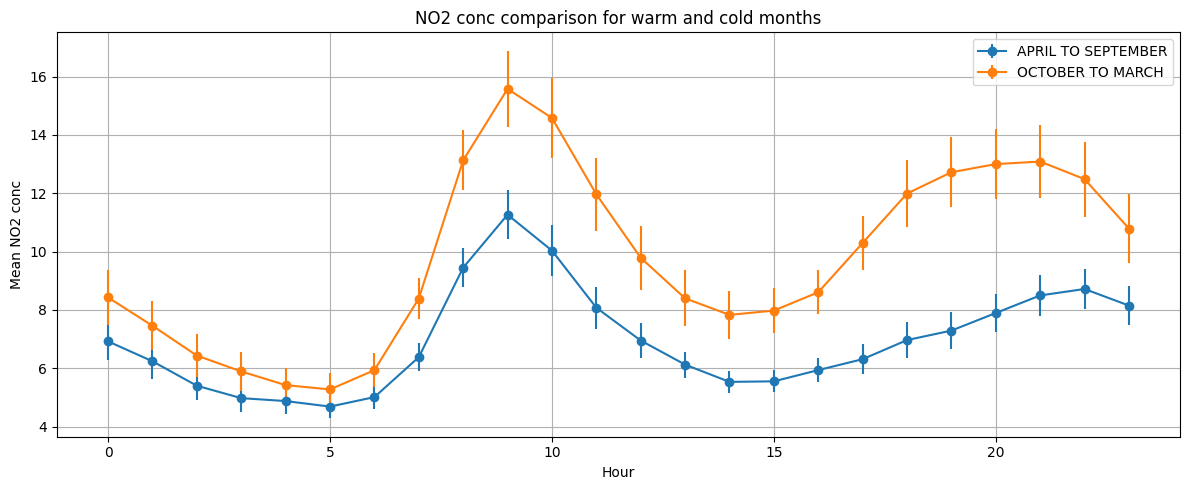

In [61]:
# comb_df_sorted['hour']=pd.to_datetime(comb_df_sorted['Timestamp']).dt.hour
agg_df_c1 = comb_df_sorted.groupby(["period", "hour"])["NO2"].agg(['mean', 'std', 'count']).reset_index()

agg_df_c1['sem'] = agg_df_c1['std'] / agg_df_c1['count']**0.5  # Standard error
agg_df_c1['ci95'] = agg_df_c1['sem'] * stats.t.ppf(0.975, df=agg_df_c1['count'] - 1)

pivot_mean = agg_df_c1.pivot(index='hour', columns='period', values='mean')
pivot_ci = agg_df_c1.pivot(index='hour', columns='period', values='ci95')


plt.figure(figsize=(12,5))
for week in pivot_mean.columns:
    plt.errorbar(pivot_mean.index,
                 pivot_mean[week],
                 yerr=pivot_ci[week],
                 fmt='-o',
                 label=week)
    
plt.title("NO2 conc comparison for warm and cold months")
plt.xlabel("Hour")
plt.ylabel("Mean NO2 conc")
plt.legend()
plt.grid(True)
plt.tight_layout()

In [62]:
summers_start_2022=pd.to_datetime('2022-06-01',format='%Y-%m-%d').date()
summers_end_2022=pd.to_datetime('2022-08-31',format='%Y-%m-%d').date()

summers_start_2023=pd.to_datetime('2023-06-01',format='%Y-%m-%d').date()
summers_end_2023=pd.to_datetime('2023-08-31',format='%Y-%m-%d').date()

summers_start_2024=pd.to_datetime('2024-06-01',format='%Y-%m-%d').date()
summers_end_2024=pd.to_datetime('2024-08-31',format='%Y-%m-%d').date()

######## winter ###########
winters_start_2022=pd.to_datetime('2022-12-01',format='%Y-%m-%d').date()
winters_end_2022=pd.to_datetime('2023-02-28',format='%Y-%m-%d').date()

winters_start_2023=pd.to_datetime('2023-12-01',format='%Y-%m-%d').date()
winters_end_2023=pd.to_datetime('2024-02-29',format='%Y-%m-%d').date()

winters_start_2024=pd.to_datetime('2024-12-01',format='%Y-%m-%d').date()
winters_end_2024=pd.to_datetime('2024-12-31',format='%Y-%m-%d').date()

winters_2022_2_start=pd.to_datetime('2022-01-01',format='%Y-%m-%d').date()
winters_2022_2_end=pd.to_datetime('2022-02-28',format='%Y-%m-%d').date()


########## autumn ############
autumn_start_2022=pd.to_datetime('2022-09-01',format='%Y-%m-%d').date()
autumn_end_2022=pd.to_datetime('2022-11-30',format='%Y-%m-%d').date()

autumn_start_2023=pd.to_datetime('2023-09-01',format='%Y-%m-%d').date()
autumn_end_2023=pd.to_datetime('2023-11-30',format='%Y-%m-%d').date()

autumn_start_2024=pd.to_datetime('2024-09-01',format='%Y-%m-%d').date()
autumn_end_2024=pd.to_datetime('2024-11-30',format='%Y-%m-%d').date()

############# spring ##############
spring_start_2022=pd.to_datetime('2022-03-01',format='%Y-%m-%d').date()
spring_end_2022=pd.to_datetime('2022-05-31',format='%Y-%m-%d').date()

spring_start_2023=pd.to_datetime('2023-03-01',format='%Y-%m-%d').date()
spring_end_2023=pd.to_datetime('2023-05-31',format='%Y-%m-%d').date()

spring_start_2024=pd.to_datetime('2024-03-01',format='%Y-%m-%d').date()
spring_end_2024=pd.to_datetime('2024-05-31',format='%Y-%m-%d').date()

In [63]:
no2_patrick_wdays_only

,Timestamp,NO2,hour,date,day_of_week
0,2022-01-04 00:00:00+00:00,7.79,0,2022-01-04,1
1,2022-01-04 01:00:00+00:00,5.54,1,2022-01-04,1
2,2022-01-04 02:00:00+00:00,4.78,2,2022-01-04,1
3,2022-01-04 03:00:00+00:00,4.76,3,2022-01-04,1
4,2022-01-04 04:00:00+00:00,4.35,4,2022-01-04,1
...,...,...,...,...,...
15444,2024-12-06 19:00:00+00:00,6.51,19,2024-12-06,4
15445,2024-12-06 20:00:00+00:00,6.43,20,2024-12-06,4
15446,2024-12-06 21:00:00+00:00,7.23,21,2024-12-06,4
15447,2024-12-06 22:00:00+00:00,7.16,22,2024-12-06,4


In [64]:
summer_months=no2_patrick_wdays_only[
    (((no2_patrick_wdays_only['date']>=summers_start_2022) & (no2_patrick_wdays_only['date']<=summers_end_2022)) |
    ((no2_patrick_wdays_only['date']>=summers_start_2023) & (no2_patrick_wdays_only['date']<=summers_end_2023)) |
    ((no2_patrick_wdays_only['date']>=summers_start_2024) & (no2_patrick_wdays_only['date']<=summers_end_2024))) &
    (no2_patrick_wdays_only['date']>=datetime.strptime("2021-12-31", "%Y-%m-%d").date())
    ]


In [65]:
winter_months=no2_patrick_wdays_only[
    (((no2_patrick_wdays_only['date']>=winters_start_2022) & (no2_patrick_wdays_only['date']<=winters_end_2022)) |
    ((no2_patrick_wdays_only['date']>=winters_start_2023) & (no2_patrick_wdays_only['date']<=winters_end_2023)) |
    ((no2_patrick_wdays_only['date']>=winters_start_2024) & (no2_patrick_wdays_only['date']<=winters_end_2024)) |
    ((no2_patrick_wdays_only['date']>=winters_2022_2_start) & (no2_patrick_wdays_only['date']<=winters_2022_2_end))) &
    (no2_patrick_wdays_only['date']>=datetime.strptime("2021-12-31", "%Y-%m-%d").date())
    ]

In [66]:
autumn_months=no2_patrick_wdays_only[
    (((no2_patrick_wdays_only['date']>=autumn_start_2022) & (no2_patrick_wdays_only['date']<=autumn_end_2022)) |
    ((no2_patrick_wdays_only['date']>=autumn_start_2023) & (no2_patrick_wdays_only['date']<=autumn_end_2023)) |
    ((no2_patrick_wdays_only['date']>=autumn_start_2024) & (no2_patrick_wdays_only['date']<=autumn_end_2024))) &
    (no2_patrick_wdays_only['date']>=datetime.strptime("2021-12-31", "%Y-%m-%d").date())
    ]


In [67]:
spring_months=no2_patrick_wdays_only[
    (((no2_patrick_wdays_only['date']>=spring_start_2022) & (no2_patrick_wdays_only['date']<=spring_end_2022)) |
    ((no2_patrick_wdays_only['date']>=spring_start_2023) & (no2_patrick_wdays_only['date']<=spring_end_2023)) |
    ((no2_patrick_wdays_only['date']>=spring_start_2024) & (no2_patrick_wdays_only['date']<=spring_end_2024))) &
    (no2_patrick_wdays_only['date']>=datetime.strptime("2021-12-31", "%Y-%m-%d").date())
    ]


In [68]:
summer_months['Season']='Summers'
winter_months['Season']='Winters'
autumn_months['Season']='Autumn'
spring_months['Season']='Spring'


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_474376\2878193253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_months['Season']='Summers'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_474376\2878193253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_months['Season']='Winters'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_474376\2878193253.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [69]:
summer_months

,Timestamp,NO2,hour,date,day_of_week,Season
2441,2022-06-01 00:00:00+01:00,4.52,0,2022-06-01,2,Summers
2442,2022-06-01 01:00:00+01:00,31.17,1,2022-06-01,2,Summers
2443,2022-06-01 02:00:00+01:00,7.20,2,2022-06-01,2,Summers
2444,2022-06-01 03:00:00+01:00,1.79,3,2022-06-01,2,Summers
2445,2022-06-01 04:00:00+01:00,1.39,4,2022-06-01,2,Summers
...,...,...,...,...,...,...
14966,2024-08-07 20:00:00+01:00,8.44,20,2024-08-07,2,Summers
14967,2024-08-07 21:00:00+01:00,7.78,21,2024-08-07,2,Summers
14968,2024-08-07 22:00:00+01:00,7.51,22,2024-08-07,2,Summers
14969,2024-08-07 23:00:00+01:00,6.78,23,2024-08-07,2,Summers


In [70]:
comb_df=pd.concat([summer_months,winter_months,autumn_months,spring_months])

In [71]:
comb_df.reset_index(inplace=True)
comb_df.drop(columns=['index'],axis=1,inplace=True)

In [72]:
comb_df

,Timestamp,NO2,hour,date,day_of_week,Season
0,2022-06-01 00:00:00+01:00,4.52,0,2022-06-01,2,Summers
1,2022-06-01 01:00:00+01:00,31.17,1,2022-06-01,2,Summers
2,2022-06-01 02:00:00+01:00,7.20,2,2022-06-01,2,Summers
3,2022-06-01 03:00:00+01:00,1.79,3,2022-06-01,2,Summers
4,2022-06-01 04:00:00+01:00,1.39,4,2022-06-01,2,Summers
...,...,...,...,...,...,...
15444,2024-05-31 19:00:00+01:00,7.63,19,2024-05-31,4,Spring
15445,2024-05-31 20:00:00+01:00,7.83,20,2024-05-31,4,Spring
15446,2024-05-31 21:00:00+01:00,8.14,21,2024-05-31,4,Spring
15447,2024-05-31 22:00:00+01:00,7.72,22,2024-05-31,4,Spring


In [73]:
comb_df['Timestamp']=pd.to_datetime(comb_df['Timestamp'], format='%d-%m-%Y %H:%M')
# how to sort a dataframe based on a column in python?
comb_df_sorted = comb_df.sort_values(by='Timestamp')
comb_df_sorted


comb_df_sorted.reset_index(inplace=True)
comb_df_sorted

,index,Timestamp,NO2,hour,date,day_of_week,Season
0,3982,2022-01-04 00:00:00+00:00,7.79,0,2022-01-04,1,Winters
1,3983,2022-01-04 01:00:00+00:00,5.54,1,2022-01-04,1,Winters
2,3984,2022-01-04 02:00:00+00:00,4.78,2,2022-01-04,1,Winters
3,3985,2022-01-04 03:00:00+00:00,4.76,3,2022-01-04,1,Winters
4,3986,2022-01-04 04:00:00+00:00,4.35,4,2022-01-04,1,Winters
...,...,...,...,...,...,...,...
15444,7800,2024-12-06 19:00:00+00:00,6.51,19,2024-12-06,4,Winters
15445,7801,2024-12-06 20:00:00+00:00,6.43,20,2024-12-06,4,Winters
15446,7802,2024-12-06 21:00:00+00:00,7.23,21,2024-12-06,4,Winters
15447,7803,2024-12-06 22:00:00+00:00,7.16,22,2024-12-06,4,Winters


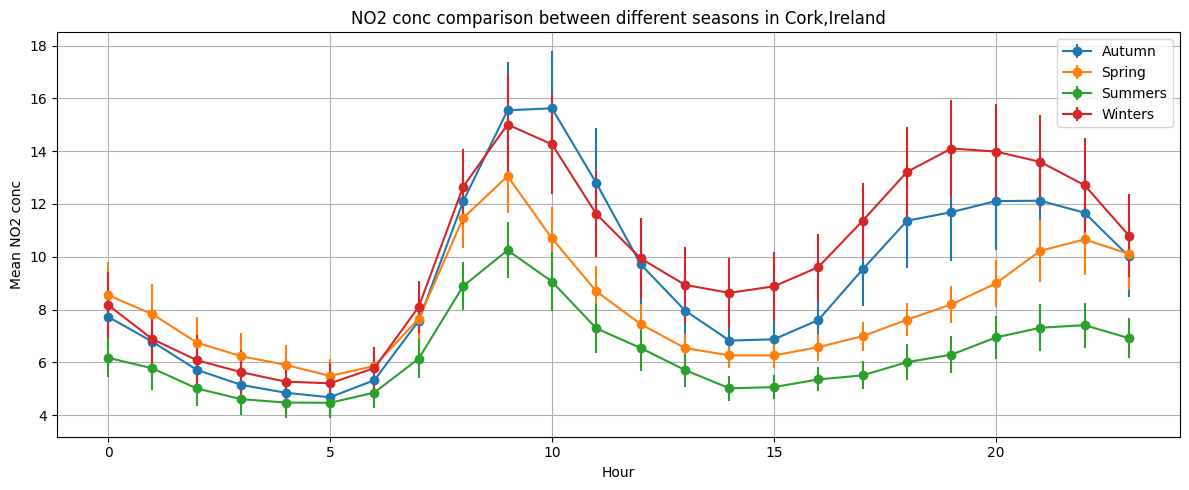

In [76]:
# comb_df_sorted['hour']=pd.to_datetime(comb_df_sorted['Timestamp']).dt.hour
agg_df_c1 = comb_df_sorted.groupby(["Season", "hour"])["NO2"].agg(['mean', 'std', 'count']).reset_index()

agg_df_c1['sem'] = agg_df_c1['std'] / agg_df_c1['count']**0.5  # Standard error
agg_df_c1['ci95'] = agg_df_c1['sem'] * stats.t.ppf(0.975, df=agg_df_c1['count'] - 1)

pivot_mean = agg_df_c1.pivot(index='hour', columns='Season', values='mean')
pivot_ci = agg_df_c1.pivot(index='hour', columns='Season', values='ci95')


plt.figure(figsize=(12,5))
for week in pivot_mean.columns:
    plt.errorbar(pivot_mean.index,
                 pivot_mean[week],
                 yerr=pivot_ci[week],
                 fmt='-o',
                 label=week)
    
plt.title("NO2 conc comparison between different seasons in Cork,Ireland")
plt.xlabel("Hour")
plt.ylabel("Mean NO2 conc")
plt.legend()
plt.grid(True)
plt.tight_layout()